IMPORT LIB

In [3]:
import pandas as pd
sm_branches = pd.read_csv('50_SupermarketBranches.csv')
ads_ctr = pd.read_csv('Ads_CTR_Optimisation.csv')
m_basket = pd.read_csv('Market_Basket_Optimisation.csv')
sm_customermembers = pd.read_csv('Supermarket_CustomerMembers.csv')

EDA branches, city

In [5]:
sm_branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
sm_branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement Spend   50 non-null     float64
 1   Promotion Spend       50 non-null     float64
 2   Administration Spend  50 non-null     float64
 3   State                 50 non-null     object 
 4   Profit                50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
sm_branches.isnull().sum()

Advertisement Spend     0
Promotion Spend         0
Administration Spend    0
State                   0
Profit                  0
dtype: int64

In [8]:
sm_branches.columns

Index(['Advertisement Spend', 'Promotion Spend', 'Administration Spend',
       'State', 'Profit'],
      dtype='object')

EDA Click-Through Rate - CTR

In [10]:
ads_ctr.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [11]:
ads_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [12]:
ads_ctr.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [13]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Hàm trợ giúp để tính khoảng tin cậy
def get_ci(click, impression):
    """
    Hàm này lấy khoảng tin cậy 95% cho tỷ lệ nhị thức
    """
    lower, upper = proportion_confint(click, impression, alpha=0.05, method='normal')
    return lower, upper

# Giả sử ads_ctr là một mảng numpy 2D, trong đó các cột đại diện cho các biến thể quảng cáo 
#và các hàng đại diện cho dữ liệu nhấp chuột
# Tính tỷ lệ nhấp chuột (CTR) cho mỗi biến thể quảng cáo
ctr = np.sum(ads_ctr, axis=0) / ads_ctr.shape[0]

# Tạo một DataFrame với các giá trị CTR
ad_df = pd.DataFrame(ctr, columns=["ctr"])

# Thêm các cột 'clicks' và 'impressions'
ad_df["clicks"] = np.sum(ads_ctr, axis=0)
ad_df["impressions"] = ads_ctr.shape[0]

# Đặt lại chỉ số và đổi tên thành 'ad_variant'
ad_df = ad_df.reset_index().rename(columns={"index": "ad_variant"})

# Tính khoảng tin cậy cho từng biến thể quảng cáo
ad_df["ci"] = ad_df.apply(lambda x: get_ci(x['clicks'], x['impressions']), axis=1)

# Tách cột 'ci' thành các cột 'lower_ci' và 'upper_ci'
ad_df["lower_ci"], ad_df["upper_ci"] = zip(*ad_df["ci"])

# Xóa cột 'ci' vì nó không còn cần thiết nữa
ad_df = ad_df.drop(columns=["ci"])

# Hiển thị DataFrame kết quả
ad_df


,ad_variant,ctr,clicks,impressions,lower_ci,upper_ci
0,Ad 1,0.1703,1703,10000,0.162933,0.177667
1,Ad 2,0.1295,1295,10000,0.122919,0.136081
2,Ad 3,0.0728,728,10000,0.067708,0.077892
3,Ad 4,0.1196,1196,10000,0.113240,0.125960
4,Ad 5,0.2695,2695,10000,0.260804,0.278196
5,Ad 6,0.0126,126,10000,0.010414,0.014786
6,Ad 7,0.1112,1112,10000,0.105038,0.117362
7,Ad 8,0.2091,2091,10000,0.201129,0.217071
8,Ad 9,0.0952,952,10000,0.089448,0.100952
9,Ad 10,0.0489,489,10000,0.044673,0.053127


In [14]:
ad_df = ad_df.rename(columns={'ad_variant':'Ad Variant',
                      'ctr':'CTR',
                      'clicks':'Clicks',
                      'impressions':'Imperssions',
                      'lower_ci':'Lower CI',
                      'upper_ci':'Upper CI'})


In [15]:
ad_df.columns

Index(['Ad Variant', 'CTR', 'Clicks', 'Imperssions', 'Lower CI', 'Upper CI'], dtype='object')

In [16]:
ad_df.to_csv('ad_results.csv', index=False)

EDA product

In [18]:
m_basket.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import pandas as pd
import numpy as np

# Bước 1: Chuyển đổi dữ liệu thành danh sách và tạo DataFrame df_prod
products = m_basket.values.tolist()
name_col = ['ID_client', 'item_description']
df_prod = pd.DataFrame(columns=name_col)

rows = []
for i, buy_list in enumerate(products):
    buy_list = set(filter(pd.notna, buy_list))  # Loại bỏ các giá trị NaN và sản phẩm trùng lặp
    for item in buy_list:
        rows.append({'ID_client': i, 'item_description': item})

df_prod = pd.DataFrame(rows, columns=name_col)

# Bước 2: Tạo danh sách các sản phẩm và DataFrame df_prod2
list_products = set(item for sublist in products for item in sublist if pd.notna(item))
list_products = list(list_products)
list_products.append('Count_products')

# Tạo DataFrame df_prod2 với các sản phẩm và cột đếm số sản phẩm
aa = np.zeros((len(products), len(list_products)))
df_prod2 = pd.DataFrame(aa, columns=list_products)

# Đếm số lượng mỗi sản phẩm và tổng số sản phẩm
for i, buy_list in enumerate(products):
    buy_list = set(filter(pd.notna, buy_list))  # Loại bỏ các giá trị NaN và sản phẩm trùng lặp
    for item in buy_list:
        if item in df_prod2.columns:
            df_prod2.loc[i, item] = 1
    df_prod2.loc[i, 'Count_products'] = df_prod2.loc[i, list_products[:-1]].sum()

# Xóa các cột NaN (nếu có)
df_prod2 = df_prod2.loc[:, (df_prod2 != 0).any(axis=0)]

# Hiển thị các thống kê mô tả
pd.set_option('display.max_columns', None)
df_prod2.describe()


,low fat yogurt,cottage cheese,mashed potato,green beans,hot dogs,sparkling water,protein bar,light cream,whole wheat rice,mint,soup,babies food,spaghetti,mineral water,zucchini,chocolate bread,ham,pasta,sandwich,cookies,green grapes,oil,asparagus,ketchup,tomato sauce,strong cheese,chutney,brownies,melons,frozen vegetables,candy bars,flax seed,bug spray,french fries,mint green tea,muffins,asparagus,oatmeal,cereals,energy drink,fromage blanc,avocado,salt,nonfat milk,grated cheese,butter,pancakes,whole wheat pasta,whole weat flour,cream,fresh tuna,rice,antioxydant juice,dessert wine,ground beef,burger sauce,cooking oil,toothpaste,parmesan cheese,tomatoes,champagne,red wine,green tea,napkins,cider,chili,bacon,mayonnaise,french wine,cake,chicken,mushroom cream sauce,bramble,salmon,tomato juice,extra dark chocolate,magazines,black tea,olive oil,yogurt cake,fresh bread,carrots,honey,body spray,pepper,pet food,gluten free bar,meatballs,turkey,water spray,corn,blueberries,clothes accessories,cauliflower,strawberries,tea,herb & pepper,shallot,frozen smoothie,chocolate,burgers,escalope,soda,milk,shampoo,light mayo,hand protein bar,eggs,spinach,energy bar,pickles,barbecue sauce,eggplant,white wine,vegetables mix,shrimp,almonds,gums,salad,yams,Count_products
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000
mean,0.076400,0.031733,0.004133,0.008667,0.032400,0.006267,0.018533,0.01560,0.058533,0.017467,0.050533,0.004533,0.174133,0.238267,0.009467,0.004267,0.026533,0.015733,0.004533,0.08040,0.008933,0.023067,0.004667,0.004400,0.014133,0.007733,0.004133,0.033733,0.012000,0.095333,0.009733,0.009067,0.008667,0.170933,0.005600,0.024133,0.000133,0.004400,0.025733,0.026533,0.013600,0.03320,0.009200,0.010400,0.052400,0.030133,0.095067,0.029467,0.009200,0.000933,0.022267,0.018800,0.008800,0.004400,0.098267,0.005867,0.051067,0.008133,0.019867,0.068400,0.046800,0.028133,0.132000,0.000667,0.010533,0.006133,0.008667,0.006133,0.022533,0.081067,0.060000,0.019067,0.001867,0.042400,0.030267,0.012000,0.010933,0.014267,0.065733,0.027333,0.043067,0.015333,0.047333,0.011467,0.026533,0.006533,0.006933,0.020933,0.062533,0.000400,0.00480,0.009200,0.008400,0.00480,0.021333,0.003867,0.049467,0.007733,0.063200,0.163867,0.087200,0.079333,0.006267,0.129600,0.004933,0.027200,0.005200,0.179733,0.006933,0.027067,0.006000,0.010800,0.013200,0.016533,0.025600,0.071333,0.020267,0.013467,0.00480,0.011333,3.911733
std,0.265655,0.175301,0.064162,0.092697,0.177072,0.078919,0.134879,0.12393,0.234765,0.131011,0.219057,0.067182,0.379249,0.426051,0.096842,0.065185,0.160726,0.124450,0.067182,0.27193,0.094099,0.

In [20]:
# Đổi tên cột từ viết thường thành viết hoa chữ cái đầu tiên
df_prod2.columns = df_prod2.columns.map(str.title)
df_prod2


,Low Fat Yogurt,Cottage Cheese,Mashed Potato,Green Beans,Hot Dogs,Sparkling Water,Protein Bar,Light Cream,Whole Wheat Rice,Mint,Soup,Babies Food,Spaghetti,Mineral Water,Zucchini,Chocolate Bread,Ham,Pasta,Sandwich,Cookies,Green Grapes,Oil,Asparagus,Ketchup,Tomato Sauce,Strong Cheese,Chutney,Brownies,Melons,Frozen Vegetables,Candy Bars,Flax Seed,Bug Spray,French Fries,Mint Green Tea,Muffins,Asparagus,Oatmeal,Cereals,Energy Drink,Fromage Blanc,Avocado,Salt,Nonfat Milk,Grated Cheese,Butter,Pancakes,Whole Wheat Pasta,Whole Weat Flour,Cream,Fresh Tuna,Rice,Antioxydant Juice,Dessert Wine,Ground Beef,Burger Sauce,Cooking Oil,Toothpaste,Parmesan Cheese,Tomatoes,Champagne,Red Wine,Green Tea,Napkins,Cider,Chili,Bacon,Mayonnaise,French Wine,Cake,Chicken,Mushroom Cream Sauce,Bramble,Salmon,Tomato Juice,Extra Dark Chocolate,Magazines,Black Tea,Olive Oil,Yogurt Cake,Fresh Bread,Carrots,Honey,Body Spray,Pepper,Pet Food,Gluten Free Bar,Meatballs,Turkey,Water Spray,Corn,Blueberries,Clothes Accessories,Cauliflower,Strawberries,Tea,Herb & Pepper,Shallot,Frozen Smoothie,Chocolate,Burgers,Escalope,Soda,Milk,Shampoo,Light Mayo,Hand Protein Bar,Eggs,Spinach,Energy Bar,Pickles,Barbecue Sauce,Eggplant,White Wine,Vegetables Mix,Shrimp,Almonds,Gums,Salad,Yams,Count_Products
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [21]:

# Tính tổng các giá trị của mỗi cột
df_prod2 = df_prod2.sum()

# Nếu muốn xoay theo chiều A, B, C thành hàng:
df_prod2 = df_prod2.reset_index().rename(columns={'index': 'Column', 0: 'Total'})

# Hiển thị DataFrame sau khi xoay
df_prod2

,Column,Total
0,Low Fat Yogurt,573.0
1,Cottage Cheese,238.0
2,Mashed Potato,31.0
3,Green Beans,65.0
4,Hot Dogs,243.0
...,...,...
116,Almonds,152.0
117,Gums,101.0
118,Salad,36.0
119,Yams,85.0


In [22]:
df_prod2 = df_prod2.iloc[:-1]

In [56]:
df_prod2['Column'].unique()

array(['Low Fat Yogurt', 'Cottage Cheese', 'Mashed Potato', 'Green Beans',
       'Hot Dogs', 'Sparkling Water', 'Protein Bar', 'Light Cream',
       'Whole Wheat Rice', 'Mint', 'Soup', 'Babies Food', 'Spaghetti',
       'Mineral Water', 'Zucchini', 'Chocolate Bread', 'Ham', 'Pasta',
       'Sandwich', 'Cookies', 'Green Grapes', 'Oil', 'Asparagus',
       'Ketchup', 'Tomato Sauce', 'Strong Cheese', 'Chutney', 'Brownies',
       'Melons', 'Frozen Vegetables', 'Candy Bars', 'Flax Seed',
       'Bug Spray', 'French Fries', 'Mint Green Tea', 'Muffins',
       ' Asparagus', 'Oatmeal', 'Cereals', 'Energy Drink',
       'Fromage Blanc', 'Avocado', 'Salt', 'Nonfat Milk', 'Grated Cheese',
       'Butter', 'Pancakes', 'Whole Wheat Pasta', 'Whole Weat Flour',
       'Cream', 'Fresh Tuna', 'Rice', 'Antioxydant Juice', 'Dessert Wine',
       'Ground Beef', 'Burger Sauce', 'Cooking Oil', 'Toothpaste',
       'Parmesan Cheese', 'Tomatoes', 'Champagne', 'Red Wine',
       'Green Tea', 'Napkins', 'Cide

In [79]:
df_prod2['Product']=df_prod2['Column']

In [68]:
import pandas as pd

# Nhóm các sản phẩm
groups = {
    'Dairy Products': ['Low Fat Yogurt', 'Cottage Cheese', 'Light Cream', 'Nonfat Milk', 
                       'Grated Cheese', 'Butter', 'Parmesan Cheese', 'Yogurt Cake', 'Cream', 'Fromage Blanc'],
    'Vegetables and Fruits': ['Green Beans', 'Zucchini', 'Tomatoes', 'Carrots', 
                              'Asparagus', 'Avocado', 'Corn', 'Cauliflower', 
                              'Strawberries', 'Blueberries', 'Melons', 'Green Grapes'],
    'Meat and Meat Products': ['Ham', 'Ground Beef', 'Turkey', 'Shrimp', 'Salmon', 
                               'Meatballs', 'Bacon', 'Chicken', 'Hot Dogs', 'Burgers', 'Escalope'],
    'Beverages': ['Sparkling Water', 'Mineral Water', 'Red Wine', 'White Wine', 'Dessert Wine', 
                  'Champagne', 'Tomato Juice', 'Green Tea', 'Black Tea', 'Mint Green Tea', 'Energy Drink'],
    'Snacks': ['Protein Bar', 'Energy Bar', 'Candy Bars', 'Muffins', 'Brownies', 'Cookies', 
               'French Fries', 'Pancakes', 'Chocolate'],
    'Household and Personal Care': ['Toothpaste', 'Shampoo', 'Body Spray', 'Water Spray', 
                                    'Bug Spray', 'Pet Food', 'Clothes Accessories'],
    'Alcoholic Beverages': ['French Wine', 'Red Wine', 'White Wine', 'Champagne', 'Cider'],
    'Bakery and Sweets': ['Chocolate Bread', 'Yogurt Cake', 'Fresh Bread', 'Honey'],
}

# Hàm để xác định nhóm của sản phẩm
def find_group(product):
    for group, items in groups.items():
        if product in items:
            return group
    return 'Miscellaneous'

# Tạo cột mới 'Group' để in nhóm tương ứng
df_prod2['Group'] = df_prod2['Product'].apply(find_group)

# Hiển thị DataFrame kết quả
df_prod2


,Column,Total,Product,Group
0,Low Fat Yogurt,573.0,Low Fat Yogurt,Dairy Products
1,Cottage Cheese,238.0,Cottage Cheese,Dairy Products
2,Mashed Potato,31.0,Mashed Potato,Miscellaneous
3,Green Beans,65.0,Green Beans,Vegetables and Fruits
4,Hot Dogs,243.0,Hot Dogs,Meat and Meat Products
...,...,...,...,...
115,Shrimp,535.0,Shrimp,Meat and Meat Products
116,Almonds,152.0,Almonds,Miscellaneous
117,Gums,101.0,Gums,Miscellaneous
118,Salad,36.0,Salad,Miscellaneous


In [75]:
df_prod2.to_csv('products.csv', index=False)

Use KMeans to clustering

In [25]:
sm_customermembers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


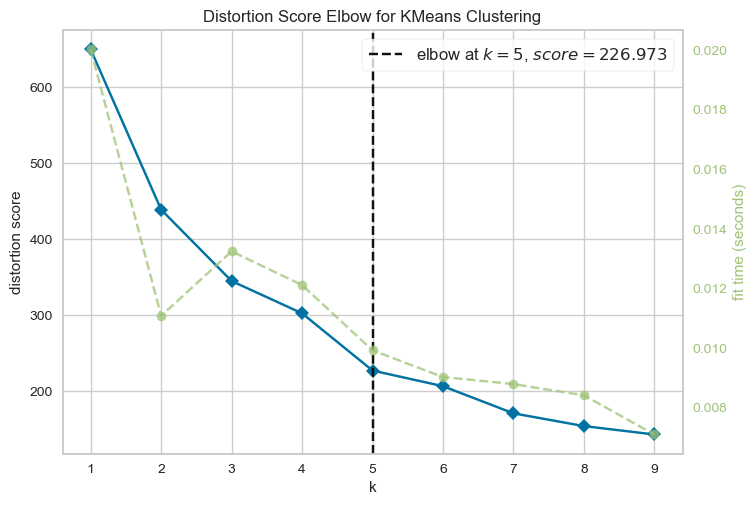

In [82]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import DBSCAN, KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
import statsmodels.stats.proportion as sm

import warnings
warnings.filterwarnings('ignore')

# Đọc
data = pd.read_csv("Supermarket_CustomerMembers.csv")

# Đổi tên các cột để dễ sử dụng
data = data.rename(columns={"CustomerID" : "customerid", 
                            "Genre": "gender", 
                            "Age" : "age", 
                            "Annual Income (k$)": "income", 
                            "Spending Score (1-100)" : "spending_score"}
                  ).drop(columns = ["customerid"])


data.head()

# Quy trình để tiền xử lý và chuẩn hóa dữ liệu
numeric_features = ["age", "income", "spending_score"]
binary_features = ["gender"]

numeric_transformer = make_pipeline(
    StandardScaler(),
)

binary_transformer = make_pipeline(
    OneHotEncoder(drop="if_binary"), 
)

# Bộ tiền xử lý
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
)

# chuẩn hóa dữ liệu
data_pro = preprocessor.fit_transform(data)

# Các đặc trưng đã được chuẩn hóa
col_names = numeric_features + binary_features
data_pro = pd.DataFrame(data_pro, columns = col_names)
data_pro.head()

from yellowbrick.cluster import KElbowVisualizer
# Phương pháp Khuỷu tay để xác định số lượng cụm
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(data_pro)  # Khớp dữ liệu với công cụ trực quan hóa
visualizer.show();

In [27]:
# Khởi tạo và huấn luyện mô hình K-means với k=4
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(data_pro)

# Xem các cụm đã được gán
data

,gender,age,income,spending_score,cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,2
197,Male,32,126,74,3
198,Male,32,137,18,2


In [28]:
data.to_csv('Cluster_Customer.csv', index=False)